In [ ]:
!pip install transformers > None

## Huggingface

Платформа HuggingFace это коллекция готовых современных предварительно обученных Deep Learning моделей. А библиотека Transformers предоставляет инструменты и интерфейсы для их простой загрузки и использования.

[HuggingFace Модели](https://huggingface.co/models)

### Transformers

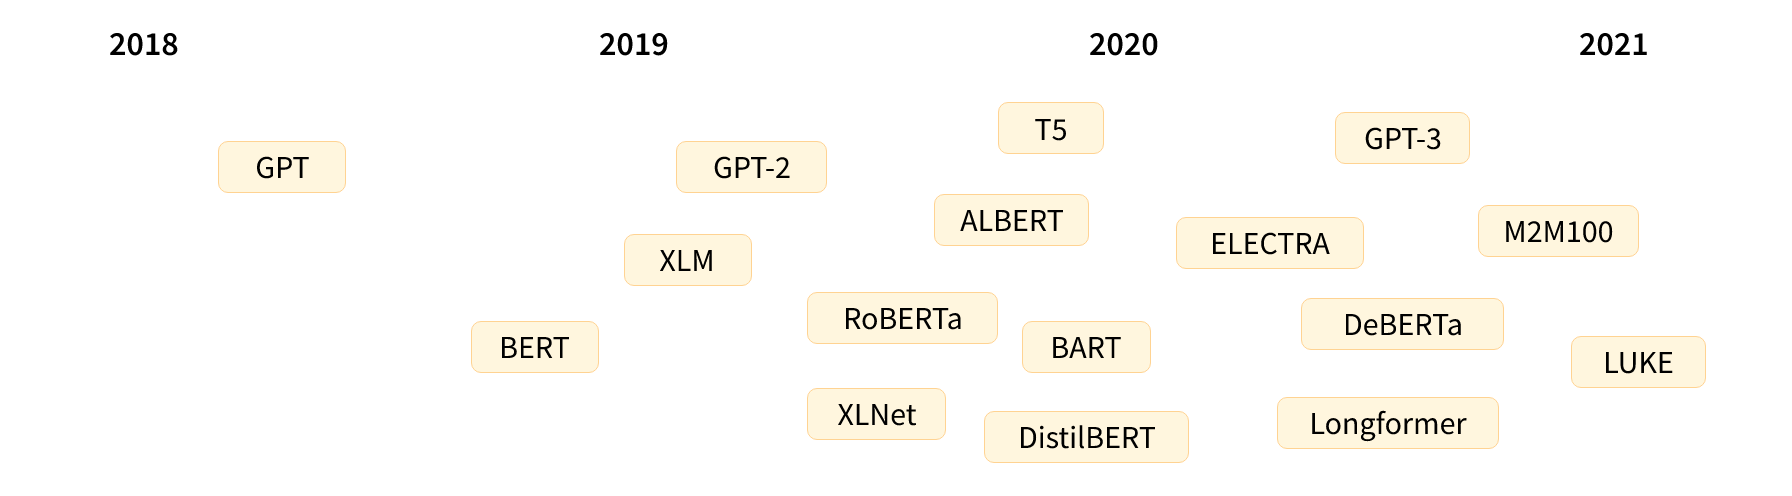

Трансформер - языковая модель

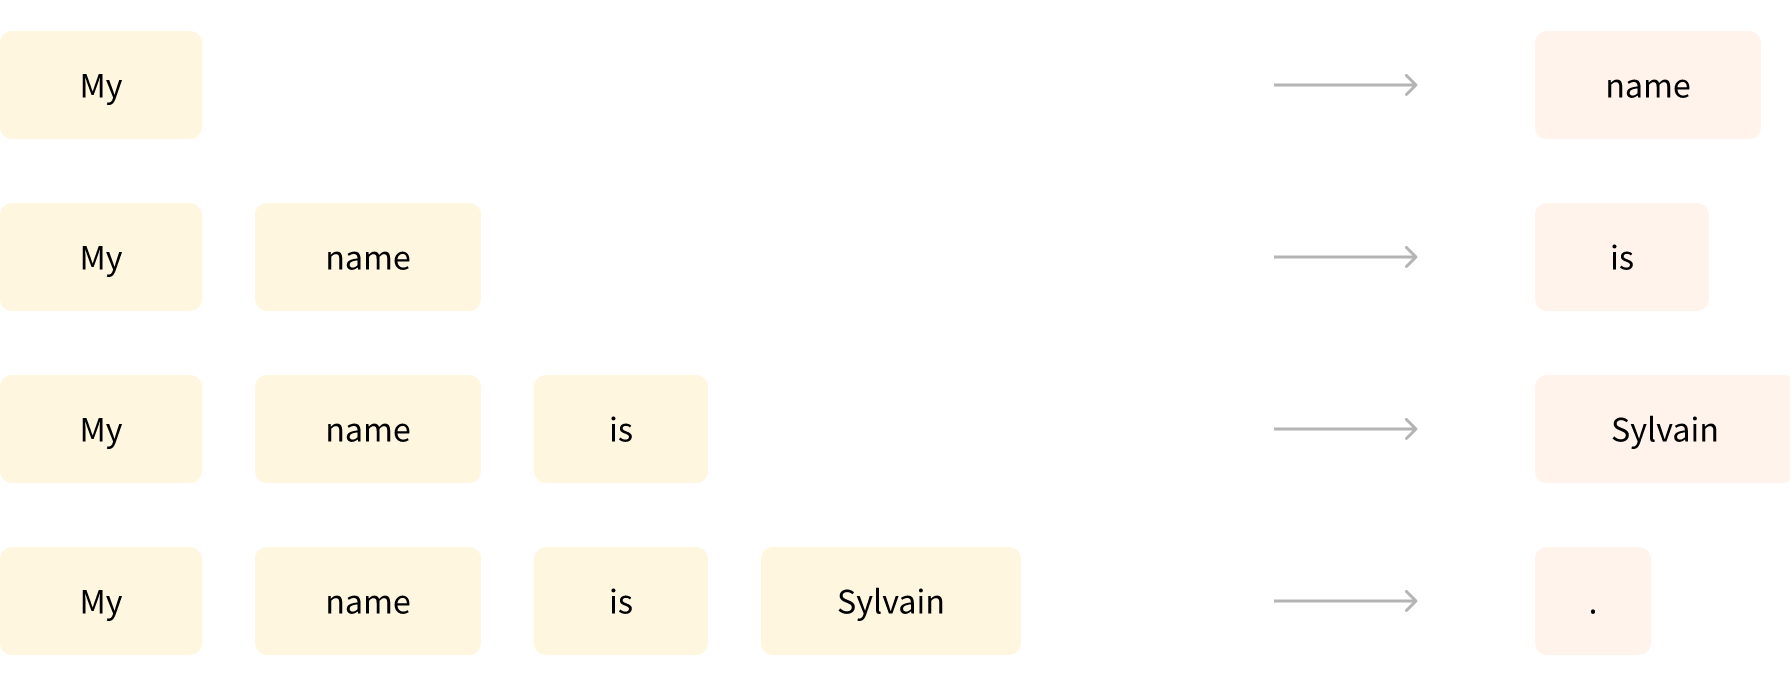

### Архитектура

#### Attention - Внимание

Ключевой особенностью моделей Transformer является то, что они построены со специальными слоями, называемыми слоями внимания. Эти слои позволяют модели обращать особое внимание на определенные слова во входном предложении.

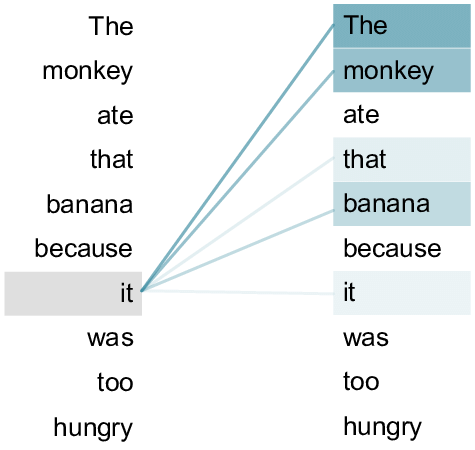

### Transformers  Pipeline

Доступные пайплайны:

- feature-extraction (get the vector representation of a text)
- ner (named entity recognition)
- question-answering
- sentiment-analysis
- summarization
- text-generation
- translation
- zero-shot-classification

In [ ]:
from transformers import pipeline

#### Классификация

In [ ]:
classifier = pipeline("zero-shot-classification")
classifier(
    "This is a course about Machine Learning",
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'sequence': 'This is a course about Machine Learning',
 'labels': ['business', 'education', 'politics'],
 'scores': [0.48862147331237793, 0.35796403884887695, 0.15341444313526154]}

Pipeline называется zero-shot, потому что нет необходимости дообучать модель на своих данных

#### Sentiment-analysis

In [ ]:
clf = pipeline(
    task = 'sentiment-analysis',
    model = 'SkolkovoInstitute/russian_toxicity_classifier')

text = [
    'Только дураки нуждается в порядке — гении господствуют над хаосом.',
    'Как минимум два дегенерата в треде, мда.',
    'ИТМО — центр передовой науки и  образования в России'
]

clf(text)

Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


[{'label': 'toxic', 'score': 0.8172955513000488},
 {'label': 'toxic', 'score': 0.9848678708076477},
 {'label': 'neutral', 'score': 0.9988148212432861}]

#### Генерация текста

In [ ]:
generator = pipeline("text-generation")
generator("In this machine learning course, we will learn how to")

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (50) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': 'In this machine learning course, we will learn how to solve new problems in computing and build systems that can be used both for applications and for companies. The course covers practical use of machine learning, problem solver and object oriented problem solving techniques. You'}]

#### Генерация текста с русскоязычной моделью

In [ ]:
generator = pipeline("text-generation", model="sberbank-ai/rugpt3small_based_on_gpt2")
generator(
    "В этом курсе мы научимся применять машинное обучение для",
    max_length=30,
    num_return_sequences=1,
)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'В этом курсе мы научимся применять машинное обучение для решения задач, связанных с управлением и контролем качества.  В этом курсе мы научимся использовать машин'}]

#### Question Answering

In [ ]:
question_answerer = pipeline("question-answering")
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.6949767470359802, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}